<a href="https://colab.research.google.com/github/choudhurysibani120/credit-card-default-prediction/blob/main/Team_Notebook_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
credit_df=pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls',header=1)

In [4]:
credit_df.head()

ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
0   1      20000    2  ...         0         0                           1
1   2     120000    2  ...         0      2000                           1
2   3      90000    2  ...      1000      5000                           0
3   4      50000    2  ...      1069      1000                           0
4   5      50000    1  ...       689       679                           0

[5 rows x 25 columns]

In [5]:
credit_df.shape

(30000, 25)

In [6]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
credit_df.drop('ID',axis=1,inplace=True)

In [8]:
credit_df=credit_df.apply(lambda x: pd.to_numeric(x))
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [9]:
credit_df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
credit_df.describe()

LIMIT_BAL           SEX  ...       PAY_AMT6  default payment next month
count    30000.000000  30000.000000  ...   30000.000000                30000.000000
mean    167484.322667      1.603733  ...    5215.502567                    0.221200
std     129747.661567      0.489129  ...   17777.465775                    0.415062
min      10000.000000      1.000000  ...       0.000000                    0.000000
25%      50000.000000      1.000000  ...     117.750000                    0.000000
50%     140000.000000      2.000000  ...    1500.000000                    0.000000
75%     240000.000000      2.000000  ...    4000.000000                    0.000000
max    1000000.000000      2.000000  ...  528666.000000                    1.000000

[8 rows x 24 columns]

In [11]:
var=[]
for i,col in enumerate(credit_df.columns):
 var.append(credit_df[col].value_counts().shape[0])
num_cat_sep=pd.DataFrame({'columns':credit_df.columns,'Unique_counts':var})
categorical_variable=num_cat_sep[num_cat_sep['Unique_counts']<15]['columns']
numerical_variables=num_cat_sep[num_cat_sep['Unique_counts']>15]['columns']

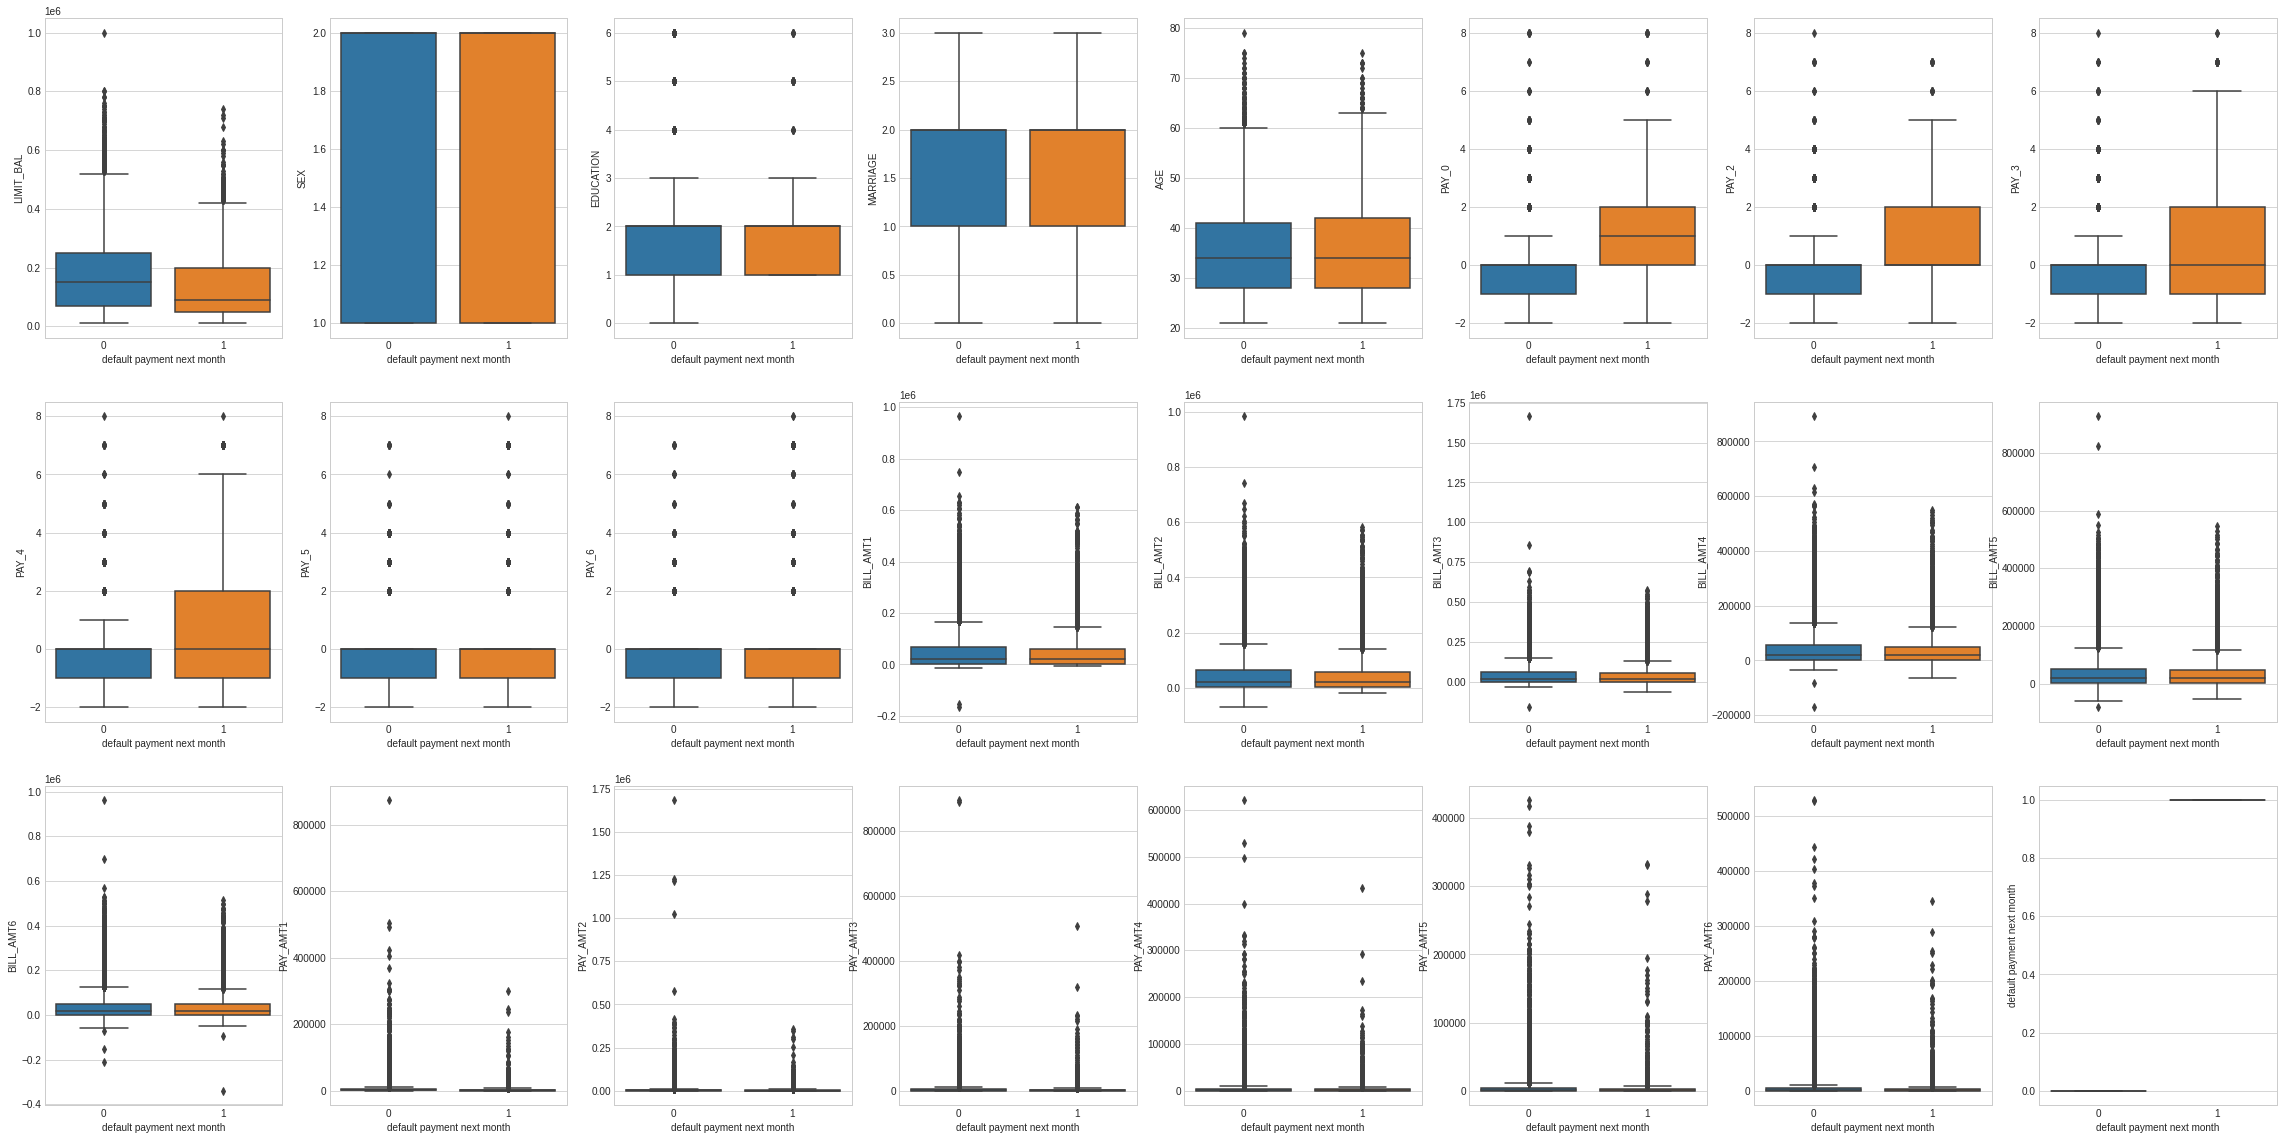

In [12]:
plt.figure(figsize=[40,20])
for i,col in enumerate(credit_df.columns):
 plt.subplot(3,8,i+1)
 sns.boxplot(data=credit_df,y=col,x='default payment next month')
plt.show()

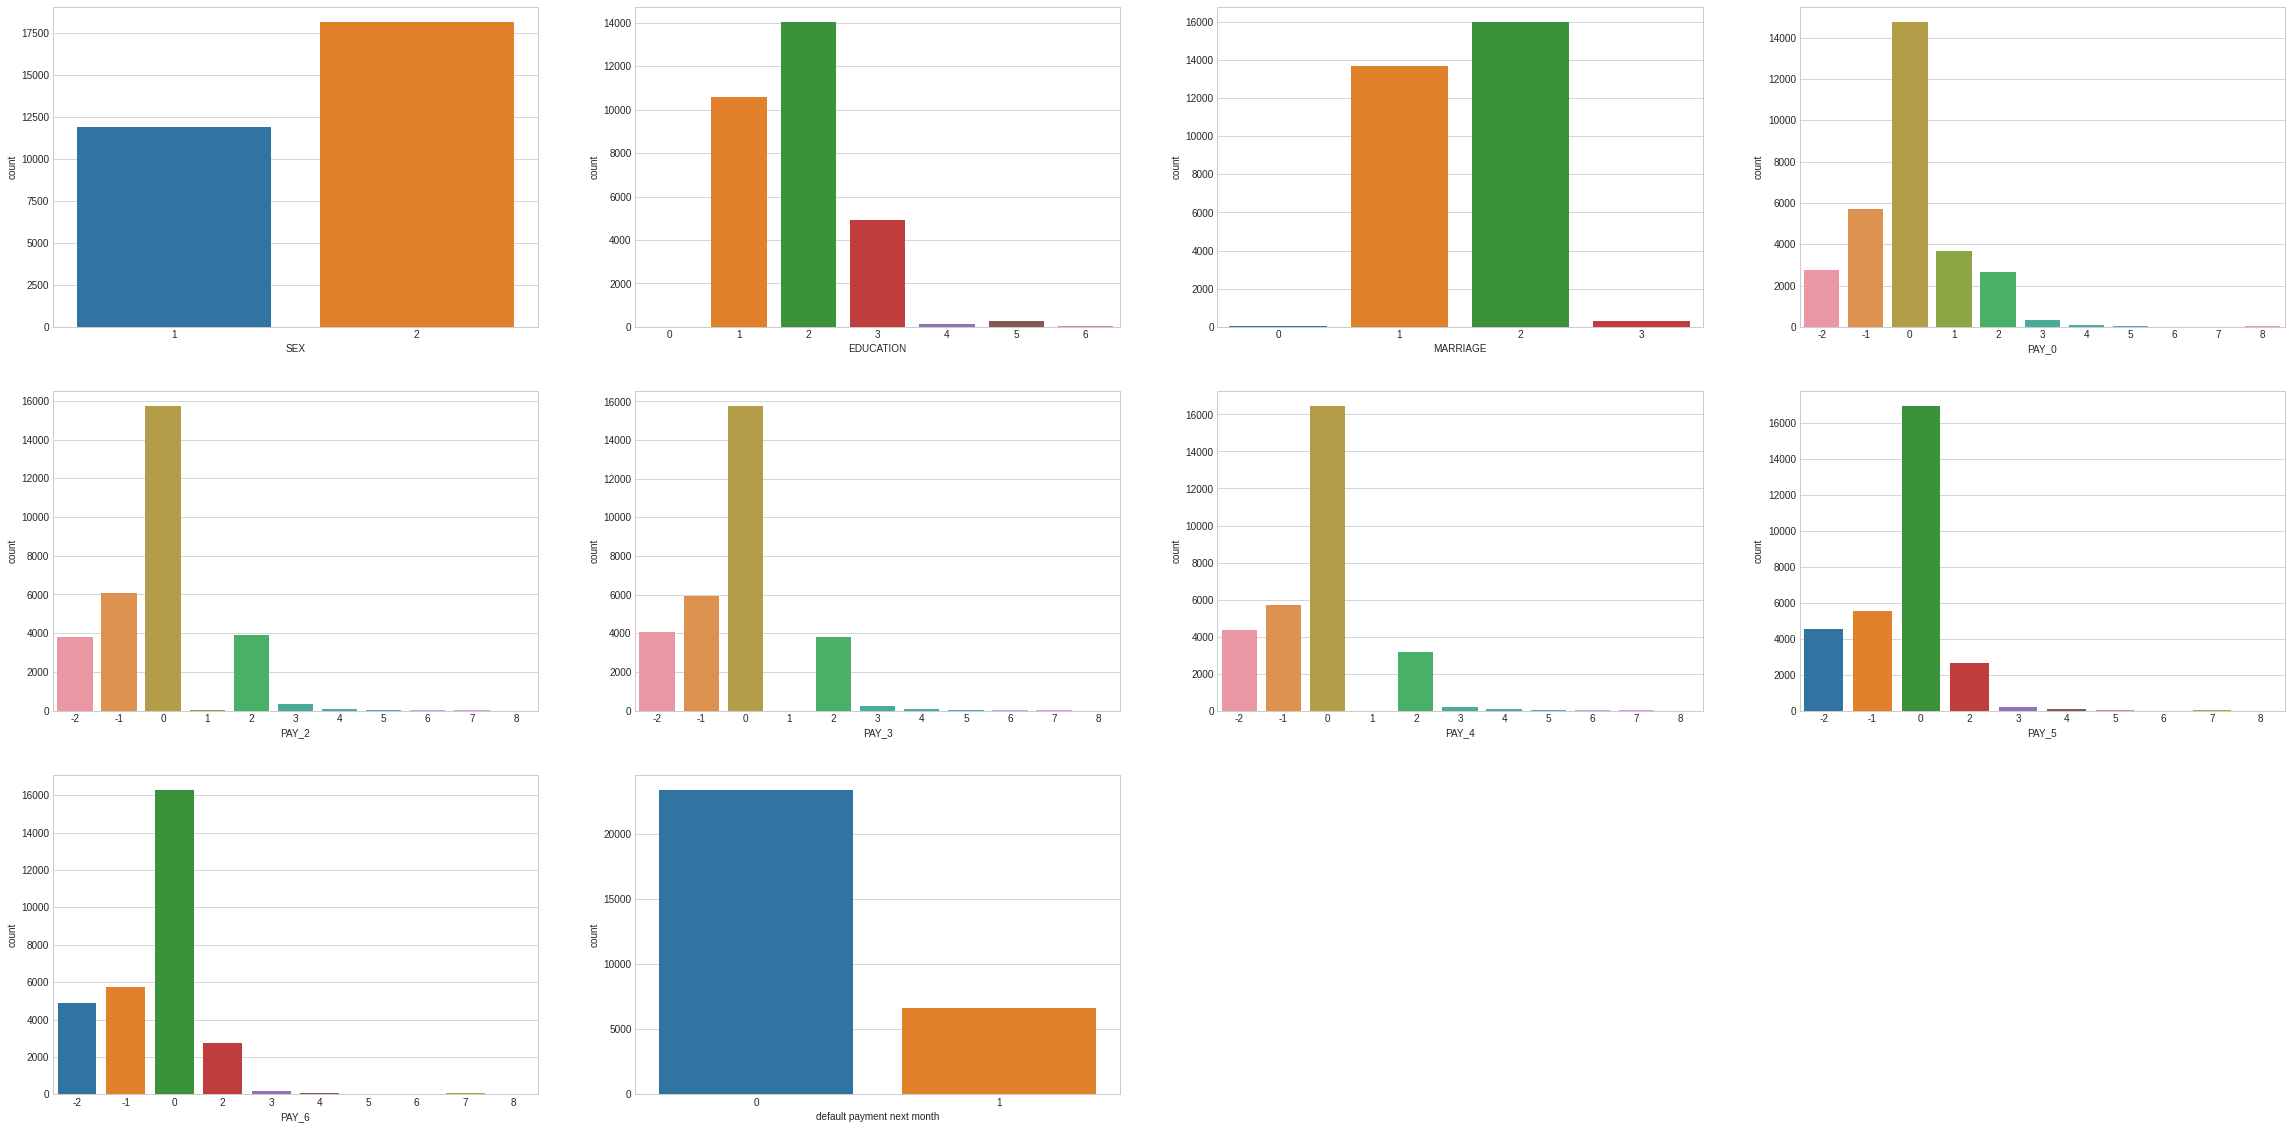

In [22]:
plt.figure(figsize=[40,20])
for i,col in enumerate(categorical_variable):
 plt.subplot(3,4,i+1)
 sns.countplot(x=col,data=credit_df)
plt.show()

In [13]:

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [14]:
credit_df_cat = credit_df[categorical_features]
credit_df_cat['Defaulter'] =credit_df['default payment next month']

In [15]:
credit_df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 720x360 with 0 Axes>

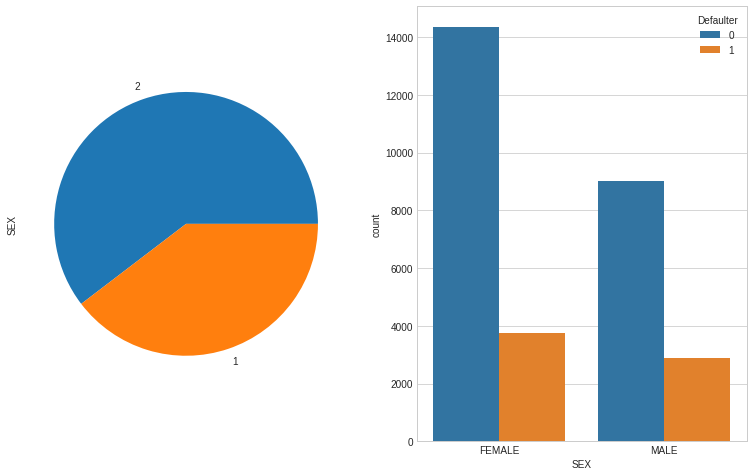

<Figure size 720x360 with 0 Axes>

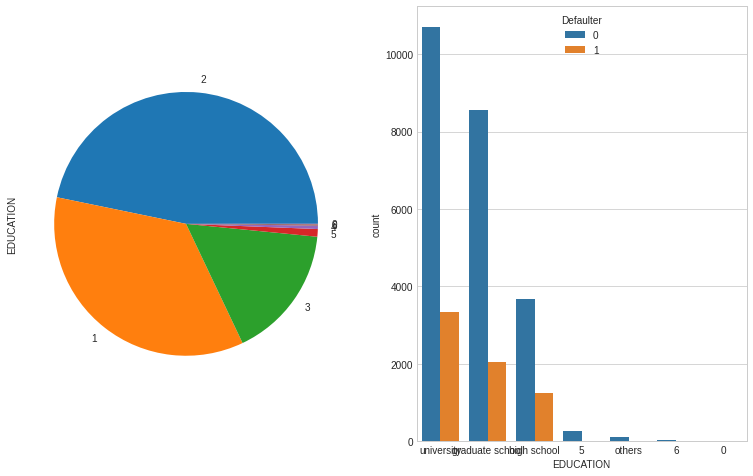

<Figure size 720x360 with 0 Axes>

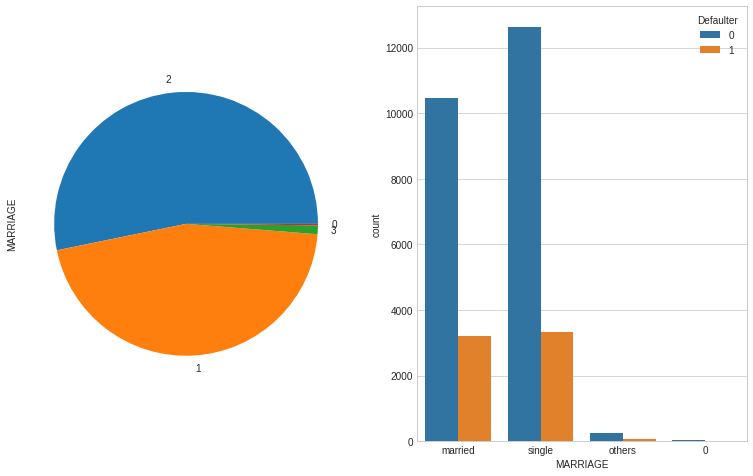

In [16]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  credit_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = credit_df_cat)


Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.

No. of defaulters have a higher proportion of educated people (graduate school and university)

No. of defaulters have a higher proportion of Singles.

In [17]:
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [19]:
credit_df['AGE']=credit_df['AGE'].astype('int')

In [20]:

fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=credit_df['AGE'].value_counts().reset_index()
credit_df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [26]:

bill_amnt_credit_df = credit_df[['BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6']]

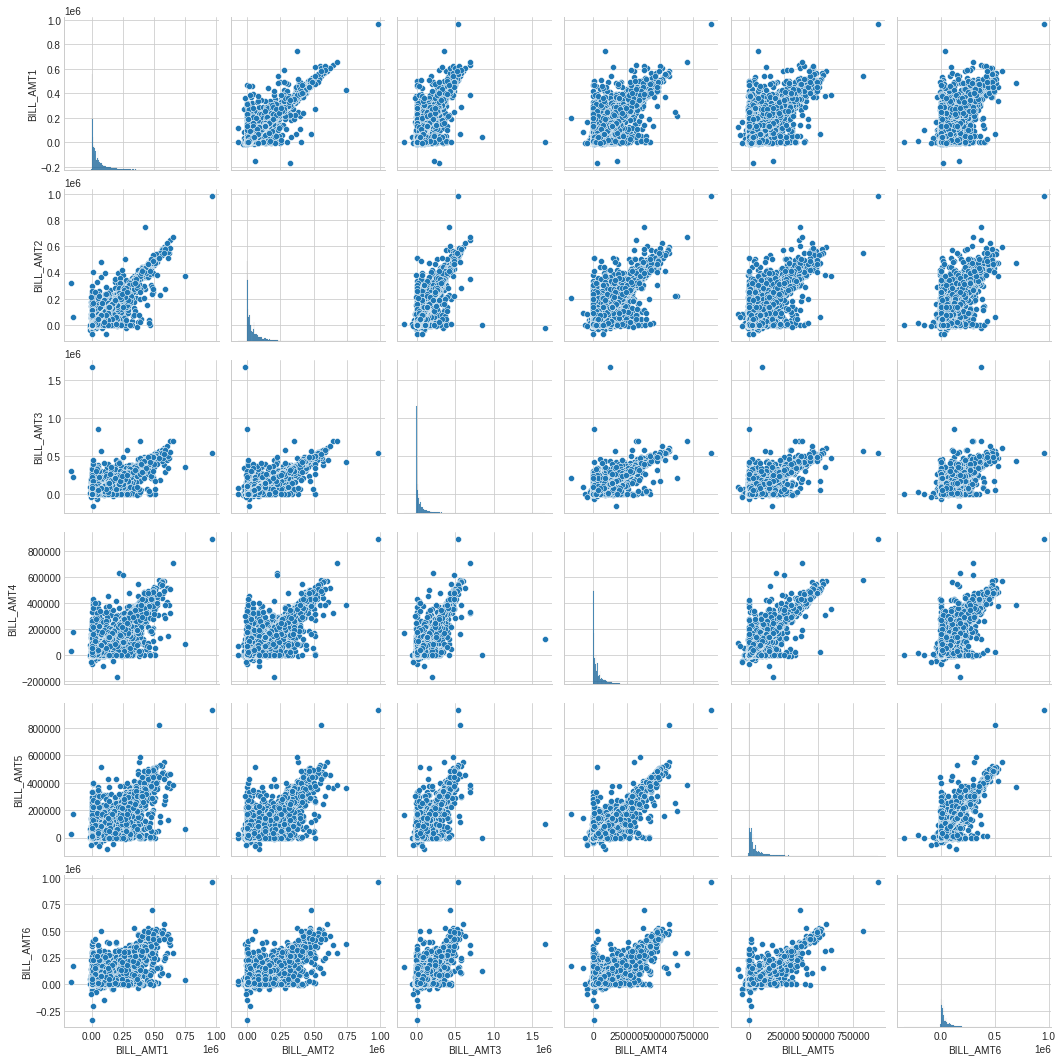

In [27]:
sns.pairplot(data = bill_amnt_credit_df)

In [29]:
# Create a new column "HAS_DEF" to indicate customers who have at least 1 deafult payment from PAY_1 to Pay_6
# 0 : no default ; 1: has default

def_condition = (credit_df.PAY_0 >1) | (credit_df.PAY_2 >1) | (credit_df.PAY_3 >1) | (credit_df.PAY_4 >1) | (credit_df.PAY_5 >1) | (credit_df.PAY_6 >1)
credit_df.loc[def_condition, "HAS_DEF"] = 1
credit_df.loc[credit_df.HAS_DEF.isna(), "HAS_DEF"] = 0

In [33]:
# Subset a dataframe with the records that have default

has_default = credit_df[credit_df['HAS_DEF']== 1]
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_0']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_0'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

There was a huge jump from May,2005 (PAY_5) to July, 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August, 2005 (PAY_2), things started to get better in September, 2005 (PAY_0).

In [35]:

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(credit_df.iloc[:,0:-1], credit_df['default payment next month'])

print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [36]:
x_smote

array([[ 20000,      2,      2, ...,      0,      0,      1],
       [120000,      2,      2, ...,      0,   2000,      1],
       [ 90000,      2,      2, ...,   1000,   5000,      0],
       ...,
       [200000,      2,      1, ...,   5390,   5203,      1],
       [ 50000,      1,      2, ...,    770,    564,      1],
       [ 70000,      1,      2, ...,   3537,   1402,      1]])

Splitting train and test

In [23]:
X=credit_df[set(credit_df.columns)-{'default payment next month'}]
y=credit_df[{'default payment next month'}]